In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
imdb = keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 5s 0us/step


In [12]:
print(len(train_data[0]),len(train_data[3]))

256 256
0


In [5]:
word_index = imdb.get_word_index()
#reserve first three index
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

def decode_review(text):
    # dict.get(key,default)
    return ' '.join([reverse_word_index.get(i,'?') for i in text])



1646592/1641221 [==============================] - 0s 0us/step


In [6]:
print(train_data[0])
decode_review(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [9]:
# Preparing data
# 我们可以填充数组，使它们都具有相同的长度，然后创建一个形状为 max_length * num_reviews 的整数张量。我们可以使用一个能够处理这种形状的嵌入层作为网络中的第一层。
train_data = keras.preprocessing.sequence.pad_sequences(train_data,value = word_index["<PAD>"],padding ='post',maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,value=word_index["<PAD>"],padding = 'post',maxlen=256)
print(len(train_data[9]))
print(train_data[5])

256
[   1  778  128   74   12  630  163   15    4 1766 7982 1051    2   32
   85  156   45   40  148  139  121  664  665   10   10 1361  173    4
  749    2   16 3804    8    4  226   65   12   43  127   24    2   10
   10    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

In [49]:
model = keras.Sequential()
# Embedding: turns positive integers(indexes) into dense vectors of fixed size
# The total number of parameters for embedding layer is 160,000.
vocab_size = 10000 # input shape is the vocabulary count used for the movie reviews (10,000 words)
# here we have a set of 10000 voca which is input_dim, and 16 output dim
model.add(keras.layers.Embedding(vocab_size, 16))
# Pooling layer does not need parameter
model.add(keras.layers.GlobalAveragePooling1D())
# The #parameters for activation layer is 272(16*17) which should be 16 pooling result adding one reg element.
model.add(keras.layers.Dense(16,activation = tf.nn.relu))
# 16 activation results add one reg.
model.add(keras.layers.Dense(1,activation = tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [50]:
# select binary_crossentropy which is appropriate to probability problem.
model.compile(optimizer = tf.train.AdamOptimizer(),loss = 'binary_crossentropy',metrics=['accuracy'])

In [51]:
x_val = train_data[:10000]
y_val = train_labels[:10000]

x_train = train_data[10000:]
y_train = train_labels[10000:]
np.random.seed(5)

In [52]:
solution = model.fit(x_train,y_train,epochs = 40,batch_size= 512, validation_data=(x_val,y_val),verbose = 1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 38us/sample - loss: 0.6916 - acc: 0.5350 - val_loss: 0.6883 - val_acc: 0.6278
Epoch 2/40
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6832 - acc: 0.7069 - val_loss: 0.6773 - val_acc: 0.6995
Epoch 3/40
15000/15000 [==============================] - 0s 26us/sample - loss: 0.6673 - acc: 0.7293 - val_loss: 0.6584 - val_acc: 0.7290
Epoch 4/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.6424 - acc: 0.7687 - val_loss: 0.6316 - val_acc: 0.7798
Epoch 5/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.6087 - acc: 0.7994 - val_loss: 0.5973 - val_acc: 0.7982
Epoch 6/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.5678 - acc: 0.8215 - val_loss: 0.5574 - val_acc: 0.8059
Epoch 7/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.5230 - acc: 0.8370 - val_loss: 0.

In [53]:
results = model.evaluate(test_data,test_labels)
results

25000/25000 [==============================] - 1s 23us/sample - loss: 0.3251 - acc: 0.8735


[0.3251118165016174, 0.87348]

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

40


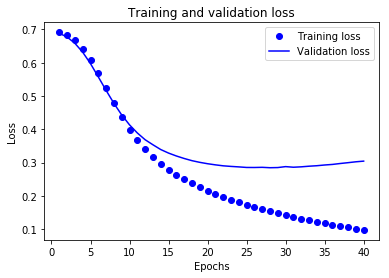

In [55]:
import matplotlib.pyplot as plt
acc = solution.history['acc']
val_acc = solution.history['val_acc']
loss = solution.history['loss']
val_loss = solution.history['val_loss']

print(len(acc))
epochs = range(1,len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

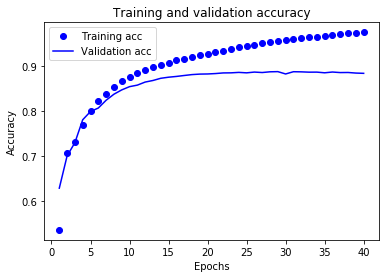

In [56]:
plt.clf()   # clear figure
acc_values = solution_dic['acc']
val_acc_values = solution_dic['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()